In [125]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thalassemia/Alpha-2_200322.xlsx
/kaggle/input/thalassemia/alpha2-research_pilot.xlsx
/kaggle/input/thalassemia/Alpha-2_addition-230622.xlsx


In [126]:
#installing the openpyxl library to import the Excel Data.
!pip install openpyxl

In [127]:
#Reading data from Excel and Converting The Dataset into DataFrame with help pf Pandas
df = pd.read_excel("../input/thalassemia/alpha2-research_pilot.xlsx", header=0)

In [128]:
#Asking the basic Question tp Perfrom The EDA on Dataset
# 7 Qestion to ask before performing EDA

# 1.How big The Data is ? 

df.shape

(258, 11)

In [130]:
# 2. How does the data look like?
df.head(5) #With head we see starting records.

,Study code,Age,Sex 0: male / 1: female,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count,Diagnosis
0,1,36,1,10.5,32.4,87.7,28.5,32.4,14.4,3.69,13
1,2,40,0,13.7,42.7,64.6,20.7,32.1,17.8,6.61,12
2,3,18,1,12.9,40.6,65.9,20.9,31.8,17.2,6.16,12
3,4,19,0,13.4,41.6,79.8,25.7,32.2,13.2,5.21,11
4,5,35,1,12.8,38.7,85.6,28.3,33.1,13.2,4.52,11


In [131]:
df.tail(5) #With tail we see starting records.

,Study code,Age,Sex 0: male / 1: female,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count,Diagnosis
253,254,26,0,14.4,41.8,86.7,29.9,34.4,11.3,4.82,11
254,255,43,1,10.9,34.3,62.6,19.9,31.8,17.9,5.48,12
255,256,49,0,13.8,40.5,90.6,30.9,34.1,13.7,4.47,11
256,257,31,1,11.6,34.9,93.9,31.3,33.5,13.6,3.71,11
257,258,37,0,15.8,48.8,68.7,22.3,32.4,18.7,7.10,12


In [133]:
df.sample(5) #With Sample we see Random records. Best get a insigits of Records.

,Study code,Age,Sex 0: male / 1: female,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count,Diagnosis
135,136,36,0,16.6,49.3,82.9,27.9,33.7,13.9,5.95,13
112,113,32,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
19,20,27,0,16.5,50.1,85.2,28.1,32.9,12.4,5.88,11
85,86,27,0,12.9,42.1,67.1,20.6,30.6,17.8,6.27,12
31,32,22,0,15.9,48.9,84.0,27.3,32.5,14.8,5.82,11


In [134]:
# 3. What datatype of columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Study code               258 non-null    int64  
 1   Age                      258 non-null    int64  
 2   Sex 0: male / 1: female  258 non-null    int64  
 3   Hb                       243 non-null    float64
 4   Hct                      243 non-null    float64
 5   MCV                      243 non-null    float64
 6   MCH                      243 non-null    float64
 7   MCHC                     243 non-null    float64
 8   RDW                      242 non-null    float64
 9   RBC count                243 non-null    float64
 10  Diagnosis                258 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 22.3 KB


In [ ]:
# 4. Are there any missing values?
df.isnull().sum()

In [135]:
# 5. How does the data look mathmatically ?
df.describe()

,Study code,Age,Sex 0: male / 1: female,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count,Diagnosis
count,258.000000,258.000000,258.000000,243.000000,243.000000,243.000000,243.000000,243.000000,242.000000,243.000000,258.000000
mean,129.500000,30.763566,0.500000,12.738272,39.177078,74.295473,24.212798,32.377695,15.822727,5.351975,12.112403
std,74.622383,6.844174,0.500972,1.888869,5.222542,10.534376,4.235001,2.491904,3.599507,0.883421,1.132712
min,1.000000,17.000000,0.000000,4.500000,18.900000,48.800000,14.700000,2.380000,9.700000,1.990000,11.000000
25%,65.250000,26.000000,0.000000,11.550000,35.550000,66.000000,20.900000,31.400000,13.200000,4.755000,11.000000
50%,129.500000,30.000000,0.500000,12.900000,39.300000,72.500000,23.000000,32.600000,15.000000,5.280000,12.000000
75%,193.750000,35.000000,1.000000,14.100000,43.300000,83.000000,27.900000,33.600000,17.200000,5.925000,12.000000
max,258.000000,58.000000,1.000000,17.400000,50.100000,96.400000,33.200000,36.200000,31.200000,7.570000,15.000000


In [137]:
# 6. Are there any duplicates Values?
df.duplicated().sum() #Retuns no. of rows

0

In [138]:
# 7. How is the correlation btween Columns ?
df.corr

<bound method DataFrame.corr of      Study code  Age  Sex 0: male / 1: female    Hb   Hct   MCV   MCH  MCHC  \
0             1   36                        1  10.5  32.4  87.7  28.5  32.4   
1             2   40                        0  13.7  42.7  64.6  20.7  32.1   
2             3   18                        1  12.9  40.6  65.9  20.9  31.8   
3             4   19                        0  13.4  41.6  79.8  25.7  32.2   
4             5   35                        1  12.8  38.7  85.6  28.3  33.1   
..          ...  ...                      ...   ...   ...   ...   ...   ...   
253         254   26                        0  14.4  41.8  86.7  29.9  34.4   
254         255   43                        1  10.9  34.3  62.6  19.9  31.8   
255         256   49                        0  13.8  40.5  90.6  30.9  34.1   
256         257   31                        1  11.6  34.9  93.9  31.3  33.5   
257         258   37                        0  15.8  48.8  68.7  22.3  32.4   

      RDW  RBC coun

In [ ]:
#________________________FINISHED ANSKING QESTION _________________________________

In [139]:
# Removing the rows with NULL values.
df_clean = df.dropna(axis=0)

In [140]:
#Checking the data size after removing null values.
df_clean.shape

(242, 11)

In [141]:
#Agian Cehecking any NULL values Present in Columns.
df_clean.isna().any()

Study code                 False
Age                        False
Sex 0: male / 1: female    False
Hb                         False
Hct                        False
MCV                        False
MCH                        False
MCHC                       False
RDW                        False
RBC count                  False
Diagnosis                  False
dtype: bool

In [142]:
# Getting Uniques values from the data set in Diagnosis columns. 
df_clean['Diagnosis'].unique()

array([13, 12, 11, 15])

In [143]:
# Removing The rows Which have Diagnosis value = 15
df_clean_remove = df_clean[df_clean['Diagnosis'] != 15]

In [ ]:
#Getting the uniques values form Da
df_clean_remove['Diagnosis'].unique()

In [ ]:
#Mathmatically view of the data
df_clean_remove.describe()

In [144]:
# A little Sight to the data
df_clean_remove

,Study code,Age,Sex 0: male / 1: female,Hb,Hct,MCV,MCH,MCHC,RDW,RBC count,Diagnosis
0,1,36,1,10.5,32.4,87.7,28.5,32.4,14.4,3.69,13
1,2,40,0,13.7,42.7,64.6,20.7,32.1,17.8,6.61,12
2,3,18,1,12.9,40.6,65.9,20.9,31.8,17.2,6.16,12
3,4,19,0,13.4,41.6,79.8,25.7,32.2,13.2,5.21,11
4,5,35,1,12.8,38.7,85.6,28.3,33.1,13.2,4.52,11
...,...,...,...,...,...,...,...,...,...,...,...
253,254,26,0,14.4,41.8,86.7,29.9,34.4,11.3,4.82,11
254,255,43,1,10.9,34.3,62.6,19.9,31.8,17.9,5.48,12
255,256,49,0,13.8,40.5,90.6,30.9,34.1,13.7,4.47,11
256,257,31,1,11.6,34.9,93.9,31.3,33.5,13.6,3.71,11


In [145]:
# Checking how many time a value is repeated.
df_clean_remove['Diagnosis'].value_counts()

12    110
11     79
13     33
Name: Diagnosis, dtype: int64

In [146]:
# Checking how many time a value is repeated with Group Method.
df_clean_remove.groupby('Diagnosis')['Diagnosis'].count()

Diagnosis
11     79
12    110
13     33
Name: Diagnosis, dtype: int64

In [ ]:
#Dividing the data.
Xo = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).values #Xo contians all the values form the dataset except the Study Code and Diagmosis Columns.
yo = df_clean_remove['Diagnosis'].values #yo contains values of Diagnosis Columns.

In [ ]:
# Size of yo.
yo.shape

In [ ]:
# Values Xo Second row.
Xo[1]

In [ ]:
# Size of Xo
Xo.shape

In [ ]:
# Changing Values in yo.
labelnames = ['Normal', 'Medium', 'Critical']
yo[yo==11] = 0 # Change value to in yo where it is 11 to 0
yo[yo==12] = 1 # Change value to in yo where it is 12 to 1
yo[yo==13] = 2 # Change value to in yo where it is 13 to 2

In [ ]:
# Insight of yo.
yo

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y, yt = train_test_split(Xo, yo, test_size=0.2, random_state=0) 
#Xo = features => X_train, X_test
#yo = label 0,1,2 => y, yt

#X_test (test)
#yt (test)

In [ ]:
# Size of y.
y.shape


In [ ]:
# Size of X_test.
X_test.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y, yv = train_test_split(X_train, y, test_size=0.2, random_state=0)
#X_train => X_train, X_val
#y => y, yv 

#X_train (train), X_val (valid)
#y (train), yv (valid)

In [ ]:
#Size of yv.
yv.shape

In [ ]:
# size of y.
y.shape

In [ ]:
# Size of X_val
X_val.shape

In [ ]:
# Size of X_test.
X_test.shape

In [ ]:
# Value of X_train first row.
X_train[0]

In [ ]:
# Class balancing to find patterns that minimize a certain loss function

In [ ]:
# Using SMOTE 
# SMOTE stands for Synthetic Minority Over-sampling Technique. It works by generating synthetic examples of the minority class by interpolating between existing examples. Here's a simplified explanation of how SMOTE works:

# a. Select a minority class example.
# b. Identify its k nearest neighbors (similar examples) from the same class.
# c. Choose one of the neighbors randomly.
# d. Create a new example by interpolating between the chosen example and the selected neighbor.
# e. Repeat the process for a specified number of times or until the desired balance is achieved.

# By generating synthetic examples, SMOTE helps balance the class distribution, making the model more sensitive to the minority class.

In [ ]:
#X_train (train), X_val (valid)
#y (train), yv (valid)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y)

from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(X_res)
X_train_norm = scl.transform(X_res) #train
X_val_norm = scl.transform(X_val) #val

X_test_norm = scl.transform(X_test) #test
y = y_res #train

In [ ]:
X_train_norm[0]

In [ ]:
import joblib
joblib.dump(scl, "thalscl.sav")

In [ ]:
y

In [ ]:
yv 

In [ ]:
# Calculate the number of unique labels (classes) in the target variable 'y'.
num_label = len(np.unique(y)) 
# Convert the original target labels 'y' into a multi-hot encoded format for training data.
# Each label is converted into a binary array indicating the presence of the label.
# For example, if y = [0, 2, 1], and num_label = 3, then y_multi becomes:
# y_multi = [[1. 0. 0.],  # Label 0 present, Labels 1 and 2 absent
#            [0. 0. 1.],  # Label 2 present, Labels 0 and 1 absent
#            [0. 1. 0.]]  # Label 1 present, Labels 0 and 2 absent
y_multi = (np.arange(num_label) == y[:,None]).astype(np.float32) #train


# Convert the validation target labels 'yv' into the same multi-hot encoded format.
yv_multi = (np.arange(num_label) == yv[:,None]).astype(np.float32) #val

# Convert the test target labels 'yt' into the same multi-hot encoded format.
yt_multi = (np.arange(num_label) == yt[:,None]).astype(np.float32) #test

In [ ]:
# Size of y_multi.
y_multi.shape

In [ ]:
# Obtain the dimensions of the normalized training data.
# 'sample_size' represents the number of samples (examples) in the training dataset.
# 'input_size' represents the number of features (input dimensions) for each sample.
sample_size, input_size = X_train_norm.shape

In [ ]:
# Size of X_train_norm
X_train_norm.shape

In [ ]:
sample_size

In [ ]:
input_size

In [ ]:
#
import tensorflow as tf
# Define a function to create a neural network model.
def create_model(input_size, num_label):
    # Set a random seed for reproducibility.
    tf.random.set_seed(0)
    
    # Clear any existing default graph to start building a new model.
    tf.compat.v1.reset_default_graph() # Clear Model
    
     # Create a Sequential model using Keras layers.
    model = tf.keras.models.Sequential([
      # First hidden layer with 16 neurons and ReLU activation,
      # input shape is determined by the 'input_size' parameter.
      tf.keras.layers.Dense(16, activation='relu', input_shape=(input_size,)),
        
        
      # Second hidden layer with 8 neurons and ReLU activation.  
      tf.keras.layers.Dense(8, activation='relu'),
        
        
      # Third hidden layer with 2 neurons and ReLU activation.
      tf.keras.layers.Dense(2, activation='relu'),
      
      # Dropout layer with a dropout rate of 0.2 to reduce overfitting.
      tf.keras.layers.Dropout(0.2),
        
      # Output layer with 'num_label' neurons and softmax activation,
      # suitable for multi-class classification.
      tf.keras.layers.Dense(num_label, activation='softmax')    
    ])
    return model

In [ ]:
# Create a neural network model using the 'create_model' function with specified input size and number of classes.
model = create_model(input_size, num_label)

# Compile the model with the Adam optimizer, categorical cross-entropy loss, and accuracy metric.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize lists to store training and validation accuracy values.
train_acc = list()  # List to store training loss values.
val_acc = list()    # List to store validation loss values.

# Train the model for a specified number of epochs (200 in this case).
for i in range(0, 200):
    # Fit the model to the training data for one epoch, using the normalized training features and one-hot encoded target labels.
    # Also, validate the model on the validation data during each epoch.
    history = model.fit(X_train_norm, y_multi, epochs=1, batch_size=sample_size, validation_data=(X_val, yv_multi))
    
    # Print the training history (which includes loss and accuracy values) for the current epoch.
    print(history)
    
    # Calculate the average training loss for the current epoch and add it to the 'train_acc' list.
    tmp_avg = np.mean(history.history['loss'])
    train_acc.append(tmp_avg)
    
    # Calculate the average validation loss for the current epoch and add it to the 'val_acc' list.
    tmp_avg_val = np.mean(history.history['val_loss'])
    val_acc.append(tmp_avg_val)


In [ ]:
# Import necessary libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visualization aesthetics.
sns.set()

# Create a new figure for the plot with specified dimensions.
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')

# Plot the training and validation loss curves.
plt.plot(train_acc)  # Plot training loss values.
plt.plot(val_acc)    # Plot validation loss values.

# Set title and labels for the plot.
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Add a legend to the plot indicating the meaning of each curve.
plt.legend(['Train', 'Val'], loc='upper left')

# Display the plot.
plt.show()


In [ ]:
# Predict the class probabilities for the test data using the trained model.
yp = model.predict(X_test_norm)


In [ ]:
yp

In [ ]:
# Predict the class labels for the test data using the trained model.
yp = model.predict(X_test_norm)

# Convert predicted probabilities to class labels by selecting the class with the highest probability for each example.
yp = np.argmax(yp, axis=1)

# Print the array of predicted class labels.
print(yp)

# Calculate the accuracy of the model's predictions by comparing with the true test labels.
accuracy = sum(yp == yt) / len(yt)


In [ ]:
yt

In [ ]:
# Import the SHAP library and initialize the JavaScript visualization.
import shap
shap.initjs()

# Create a SHAP KernelExplainer instance to explain model predictions using SHAP values.
# The explainer is created based on the model's prediction function and the normalized test data.
explainer = shap.KernelExplainer(model.predict, X_test_norm)

# Calculate SHAP values for the normalized test data using the explainer.
shap_values = explainer.shap_values(X_test_norm)


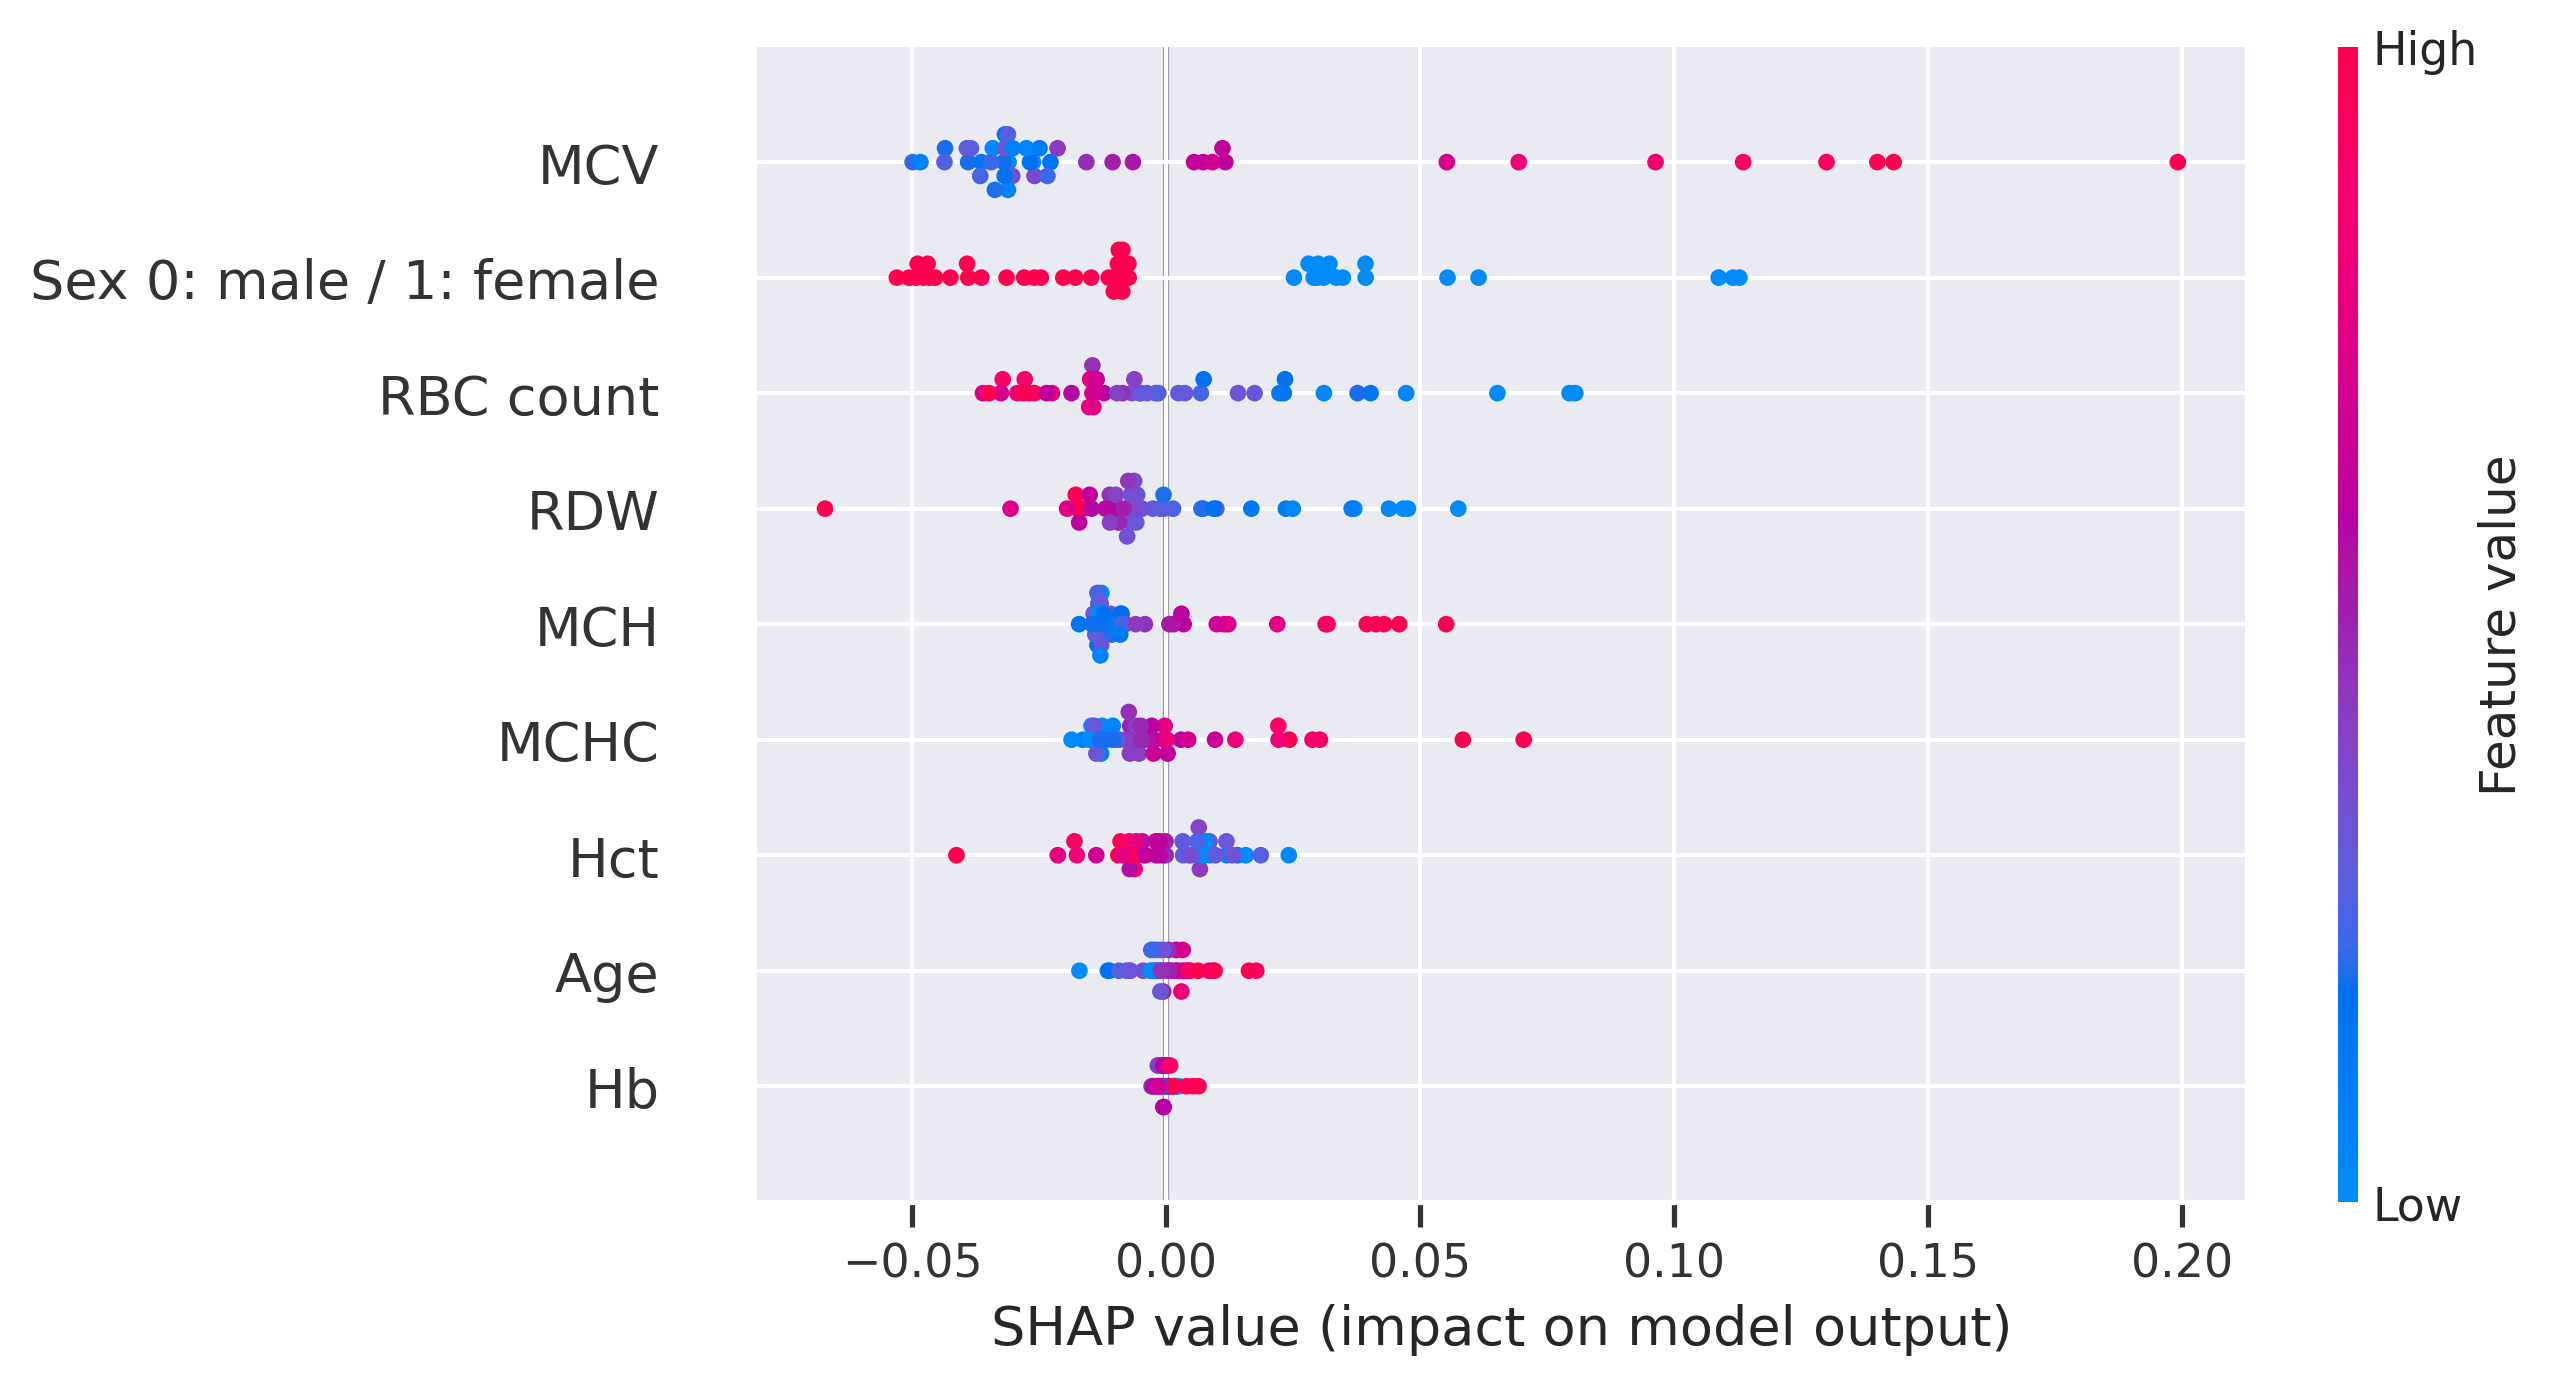

In [147]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values[0], X_test_norm, feature_names = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).columns, class_names=['Normal','Carrier','Hard-Carrier'], show=False, )
ax = plt.gca()
fig = plt.gcf()

# Save the figure as a PDF file with specified settings.
fig.savefig('%s/SHAP.pdf'%(os.getcwd()), orientation='landscape',bbox_inches = "tight", format='pdf', dpi=450)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values[1], X_test_norm, feature_names = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).columns, class_names=['Normal','Carrier','Hard-Carrier'], show=False, )
ax = plt.gca()
fig = plt.gcf()

# Save the figure as a PDF file with specified settings.
fig.savefig('%s/SHAP.pdf'%(os.getcwd()), orientation='landscape',bbox_inches = "tight", format='pdf', dpi=450)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values[2], X_test_norm, feature_names = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).columns, class_names=['Normal','Carrier','Hard-Carrier'], show=False, )
ax = plt.gca()
fig = plt.gcf()

# Save the figure as a PDF file with specified settings.
fig.savefig('%s/SHAP.pdf'%(os.getcwd()), orientation='landscape',bbox_inches = "tight", format='pdf', dpi=450)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15),dpi=300)
shap.summary_plot(shap_values, X_test_norm, feature_names = df_clean_remove.drop(['Study code', 'Diagnosis'], axis=1).columns, class_names=labelnames, show=False, )
ax = plt.gca()
fig = plt.gcf()
fig.savefig('%s/SHAP.pdf'%(os.getcwd()), orientation='landscape',bbox_inches = "tight", format='pdf', dpi=450)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in (cf/cf.astype(np.float).sum(axis=0)).flatten()]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(yt, yp)
make_confusion_matrix(cf_matrix, cmap='Blues', categories=labelnames)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = SVC(random_state=1, probability=True)
eclf = VotingClassifier(
        estimators=[('lr', clf1), 
                    ('rf', clf2), 
                    ('svm', clf3)],
        voting='soft')
params = {#'lr__C': [1.0, 100.0], 
          'rf__n_estimators': [20, 200],
          'svm__C': [1, 2, 4, 8, 16, 32],
          }
grid = GridSearchCV(estimator=eclf, param_grid=params,  cv=10)
grid = grid.fit(X_train_norm,y)

In [ ]:
import joblib
joblib.dump(grid, "thalmodel.sav")

In [ ]:
from sklearn.metrics import confusion_matrix
yp = grid.predict(X_test_norm)
cf_matrix = confusion_matrix(yt, yp)
make_confusion_matrix(cf_matrix, cmap='Blues', categories=labelnames)

In [ ]:
import sklearn

In [ ]:
sklearn.__version__

In [ ]:
features = np.hstack((1,2,3,4,5,6,7,8,9)).reshape(1, -1)

In [ ]:
features.shape